# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2020 and try to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [4]:
loans=pd.read_csv('loan_data.csv')
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# Exploratory Data Analysis

We'll use seaborn and pandas built-in plotting capabilities for visualization.


<AxesSubplot:ylabel='Frequency'>

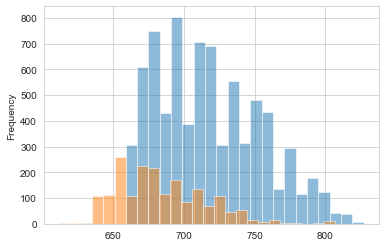

In [6]:
#a histogram of two FICO distributions on top of each other, one for each credit.policy outcome

sns.set_style('whitegrid')
loans['fico'][loans['credit.policy']==1].plot.hist(bins=25,alpha=0.5)
loans['fico'][loans['credit.policy']==0].plot.hist(bins=25,alpha=0.5)


** Creating a similar figure, except this time select by the not.fully.paid column.**

<AxesSubplot:ylabel='Frequency'>

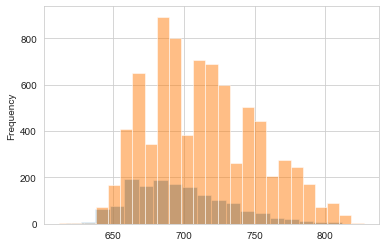

In [8]:
sns.set_style('whitegrid')
loans['fico'][loans['not.fully.paid']==1].plot.hist(bins=20,alpha=0.5)
loans['fico'][loans['not.fully.paid']==0].plot.hist(bins=25,alpha=0.5)


** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

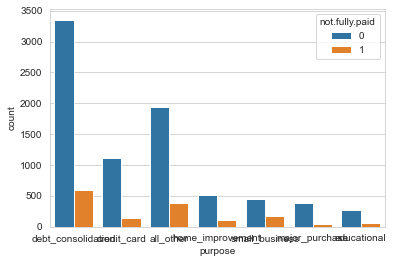

In [9]:
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)

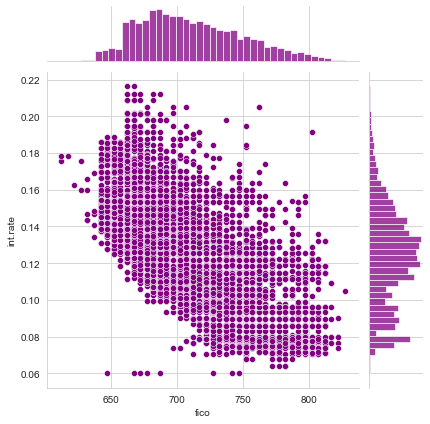

In [11]:
# Trend between FICO score and interest rate
sns.jointplot(x='fico',
    y='int.rate',
    data=loans,
    kind='scatter',
    color='purple')

following lmplots are used to see if the trend differed between not.fully.paid and credit.policy

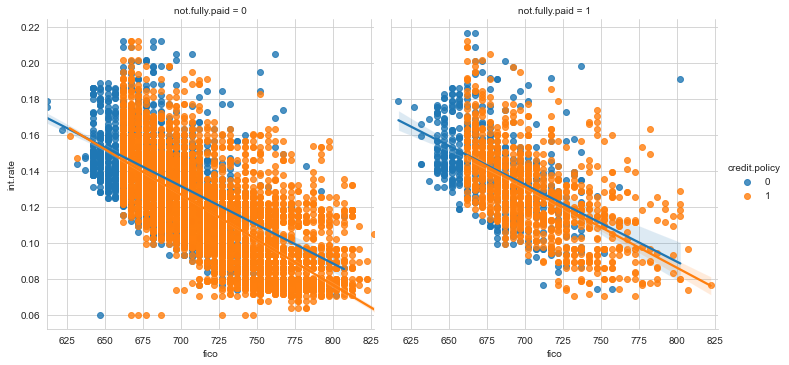

In [12]:
sns.lmplot(x='fico',
    y='int.rate',
    data=loans,
    hue='credit.policy',
    col='not.fully.paid')

** we need to transform categorical variables like 'Purpose' into dummy variables so sklearn will be able to understand them

In [21]:
cat_feats=['purpose']


In [22]:
purpose_new=pd.get_dummies(loans['purpose'],columns=cat_feats,drop_first=True)

In [24]:
loans=pd.concat([loans,purpose_new],axis=1)
loans.drop(['purpose'],axis=1,inplace=True)


In [25]:
loans.drop(['credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'major_purchase', 'small_business'],axis=1,inplace=True)
loans.columns


Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [26]:
loans=pd.concat([loans,purpose_new],axis=1)
loans.columns


Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

## Train Test Split

Now its time to split our data into a training set and a testing set!



In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=loans.drop('not.fully.paid',axis=1)
y=loans['not.fully.paid']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Creating & Training a Decision Tree Model


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree=DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [33]:
my_pred=dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,my_pred))
confusion_matrix(y_test,my_pred)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.22      0.23      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.54      0.53      3161
weighted avg       0.75      0.74      0.74      3161



array([[2229,  421],
       [ 394,  117]], dtype=int64)

## Training the Random Forest model


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [38]:
rfc_pred=rfc.predict(X_test)

**Now create a classification report from the results.**

In [39]:
print(classification_report(y_test,rfc_pred))
confusion_matrix(y_test,rfc_pred)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.43      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.63      0.51      0.47      3161
weighted avg       0.77      0.84      0.77      3161



array([[2638,   12],
       [ 502,    9]], dtype=int64)